In [ ]:
from google.colab import auth
import pandas as pd
import matplotlib.pyplot as plt
auth.authenticate_user()
query = "SELECT * FROM team-elec.Consommation_elec.Conso_tps_reel_per_year"
conso_df = pd.read_gbq(query, project_id = "team-elec")

In [ ]:
conso_df.head()

,Annee,Consommation,Prevision_j1,Prevision_j,fioul,charbon,gaz,nucleaire,eolien,eolien_terrestre,eolien_offshore,solaire,hydraulique,bioenergies,taux_co2
0,2024,766416199,775541427,770967343,2815940,922609,36829515,610083876,89621969,83268899,6354380,34924049,137390279,11315427,375101
1,2023,1513653592,1517413070,1517561909,5855902,2489465,95635238,1152669286,169382544,88425964,4105999,82999963,200469611,22684429,1073793


In [ ]:
conso_df_2023=conso_df.iloc[[1]]
conso_df_2023

,Annee,Consommation,Prevision_j1,Prevision_j,fioul,charbon,gaz,nucleaire,eolien,eolien_terrestre,eolien_offshore,solaire,hydraulique,bioenergies,taux_co2
1,2023,1513653592,1517413070,1517561909,5855902,2489465,95635238,1152669286,169382544,88425964,4105999,82999963,200469611,22684429,1073793


In [ ]:
conso_df_2023.to_csv("Conso2023.csv")

In [ ]:
#labels = conso_df_2023.columns.to_list()[4:-1]
labels_to_select = ['fioul', 'charbon', 'gaz', 'nucleaire', 'eolien', 'solaire', 'hydraulique', 'bioenergies']
selected_data = conso_df_2023[labels_to_select].iloc[0]

In [ ]:
def my_autopct(pct):
    """
    Custom autopct function to display percentage values outside the pie chart
    """
    return '%1.1f%%' % pct if pct > 1 else ''

In [ ]:
labels_to_select

['fioul',
 'charbon',
 'gaz',
 'nucleaire',
 'eolien',
 'solaire',
 'hydraulique',
 'bioenergies']

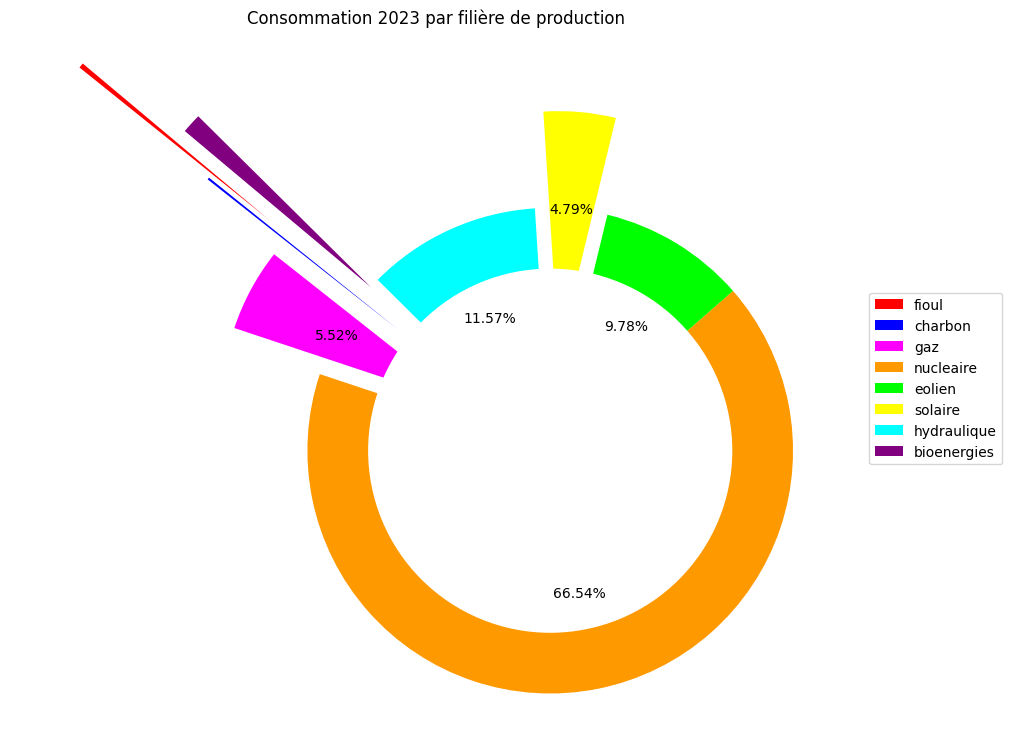

In [ ]:
# Fonction pour personnaliser les pourcentages sur les petites parts
def my_autopct(pct):
    return ('%.2f%%' % pct) if pct > 2 else ''

# Couleurs pour chaque part
colors = ['#ff0000','#0000ff','#ff00ff','#ff9900','#00ff00','#ffff00', '#00ffff', '#800080']

# Explode the small slices
explode = [1.5, .8, .4, 0, 0, .4, 0, 1]

fig, ax = plt.subplots(figsize=(11, 9))

# Création du pie chart
wedges, texts, autotexts = ax.pie(selected_data, explode=explode, labels=None, autopct=my_autopct, startangle=140, colors=colors)

# Draw a circle at the center to make it a donut chart (optionnel)
centre_circle = plt.Circle((0,0),0.75,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')
# Ajout des légendes sur le côté
ax.legend(wedges, labels_to_select, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Consommation 2023 par filière de production")
plt.show()